# WLASL (World Level American Sign Language)

I am using a dataset that I downloaded from Kaggle. This dataset has 2,000 words, and over 20,000 videos of these 2,000 words in total.

## JSON Parsing and Organizing Videos/Frames

The video names represent the video-id of that video. To find out what word the video is showing, I have to find the video ID in the WLASL_v0.3.json file and see what word that video ID belongs to. The structure of the json file is as follows:

```
[
    {
        "gloss": "<word>",
        "instances": [
            {
                ...,
                ...,
                ...,
                "video_id": "<video_id_num>"
            },
            {
                ...,
                ...,
                ...,
                "video_id": "video_id_num"
            },
            ...
        ]
    },
    {
        "gloss": "<word>",
        "instances": [
            {
                ...,
                ...,
                ...,
                "video_id": "<video_id_num>"
            },
            ...
        ]
    },
    ...
]
```

To read and parse through json files, there is a json module that is downloaded alongside python. I will use this to parse through the json file and organize all the videos into their own directory in one of the three splits: Train, Test, or Validation. In addition, each video will be split into individual frames and the frames will be saved as png images. The final directory structure will look like:
```
/Videos
|--<split_type>
|   |--<word_id>
|   |   |--<instance_id>
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   ...
|   |   |--<instance_id>
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   ...
|   |   ...
|   |--<word_id>
|   ...
|...
```

In [2]:
import json

Next, I will load the json file as an object. This will make it easy to work with in python.

In [17]:
with open('WLASL/WLASL_v0.3.json', 'r') as file:
    data = json.load(file)

The json file is now loaded as an object in python

Now I will test out how this json module works and how to parse the different properties I need.

The bracket character [] represents a list, and the curly brackets {} represent objects that have name:value pairs.

The json file starts with [], which is a list of objects. Each object has a word and another list for all the instances of that word. Each instance is an object that has name:value pairs for that instance such as: video URL, video id, start time, end time, fps, and more.

The object for the first word can be accessed by accessing the first element of the list in the data json object:

In [18]:
data[0]

{'gloss': 'book',
 'instances': [{'bbox': [385, 37, 885, 720],
   'fps': 25,
   'frame_end': -1,
   'frame_start': 1,
   'instance_id': 0,
   'signer_id': 118,
   'source': 'aslbrick',
   'split': 'train',
   'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4',
   'variation_id': 0,
   'video_id': '69241'},
  {'bbox': [190, 25, 489, 370],
   'fps': 25,
   'frame_end': -1,
   'frame_start': 1,
   'instance_id': 1,
   'signer_id': 90,
   'source': 'aslsignbank',
   'split': 'train',
   'url': 'https://aslsignbank.haskins.yale.edu/dictionary/protected_media/glossvideo/ASL/BO/BOOK-418.mp4',
   'variation_id': 0,
   'video_id': '65225'},
  {'bbox': [262, 1, 652, 480],
   'fps': 25,
   'frame_end': -1,
   'frame_start': 1,
   'instance_id': 2,
   'signer_id': 110,
   'source': 'valencia-asl',
   'split': 'train',
   'url': 'https://www.youtube.com/watch?v=0UsjUE-TXns',
   'variation_id': 0,
   'video_id': '68011'},
  {'bbox': [123, 19, 516, 358],
   'fps': 25,
   'frame_end': 60,
   'frame

The number of words in this object should be 2000. Getting the length of how many dictionary objects are in the first list should result in 2000.

In [19]:
len(data)

2000

This means all the words are in the json object

To access the word, I specify the key of the value I want. In this case, the word is the value for the key called 'gloss':

In [20]:
data[0]['gloss']

'book'

So from this, the first word in the json file is 'book'

The first instance of book is then accessed by appending [0]:

In [21]:
data[0]['instances'][0]

{'bbox': [385, 37, 885, 720],
 'fps': 25,
 'frame_end': -1,
 'frame_start': 1,
 'instance_id': 0,
 'signer_id': 118,
 'source': 'aslbrick',
 'split': 'train',
 'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4',
 'variation_id': 0,
 'video_id': '69241'}

The len() function can be used again here to get how many instances the word 'book' has.

In [22]:
len(data[0]['instances'])

40

The word 'book' has 40 instances.

Finally, to get the video-id to open the correct video, I use the video_id name.

In [23]:
data[0]['instances'][0]['video_id']

'69241'

This means that the video named 69241.mp4 is the video for the first instance of the word 'book'.

The same process can be used to extract the split (train, test, or validation) that this video is a part of, and how many frames are in this video clip.

note: This dataset already has the videos so there is no need to download the video again from the URL. But that would be an extra step if the dataset did not have the videos already.

Now that I know how to access the different name-value pairs, I can begin organizing the videos into train, test, and validation splits. Then, splitting the videos into frames.

### Organizing Videos:

Before getting the frames, I want to organize the videos into their own directories. This will make debugging later easier and it will make looking for the right videos easier.

To copy the video file, I first want to check if I have made the directory where the video will be saved. If a directory has not been made yet, I will create a new one and save the video to it.

To check if a directory exists, I can use the ```os.path.exists``` function. Then to create a directory, I use the ```os.makedirs``` function

In [2]:
import os

In [35]:
if not os.path.exists('./test_makedir/1/1/'):
    print(f'No directory called ./test_makeidr/1/1/. Creating one now')
    os.makedirs('./test_makedir/1/1/')

No directory called ./test_makeidr/1/1/. Creating one now


Now I can put this in a function that I will call for each video

In [36]:
def copy_video(directory_path, video_id):
    if not os.path.exists(directory_path):
        print(f'No directory called {directory_path}. Creating one now')
        os.makedirs(directory_path)

    copy_command = 'cp WLASL/videos/' + video_id + '.mp4' + ' ' + directory_path + '/' + video_id + '.mp4'
    os.system(copy_command)

Next, I want to start organizing the videos. I will go through each instance in each word and get the split type and video id. Then I will find the video with that video id and save it to one of: train directory, test directory, or validation directory.

In [37]:
def organize_words(end_word, start_word=0):
    for word_id in range(start_word, end_word):
        # List of dictionary objects for each word
        word = data[word_id]['gloss']
        train_instance = 0
        test_instance = 0
        val_instance = 0
        for instance in range(0,len(data[word_id]['instances'])):
            video_id = data[word_id]['instances'][instance]['video_id']
            split_type = data[word_id]['instances'][instance]['split']
            match split_type:
                case 'train':
                    directory_path = os.path.join(split_type, str(word_id), str(train_instance))
                    copy_video(directory_path, video_id)
                    train_instance += 1
                case 'test':
                    directory_path = os.path.join(split_type, str(word_id), str(test_instance))
                    copy_video(directory_path, video_id)
                    test_instance += 1
                case 'val':
                    directory_path = os.path.join(split_type, str(word_id), str(val_instance))
                    #if not os.path.exists(directory_path):
                    #    print(f'No directory called {directory_path}. Creating one now')
                    #    os.makedirs(directory_path)
                    #copy_command = 'cp WLASL/videos/' + video_id + '.mp4' + ' ' + directory_path + '/' + video_id + '.mp4'
                    #os.system(copy_command)
                    copy_video(directory_path, video_id)
                    val_instance += 1                       

Now I can call this and specify how many words I want to go through and where to start. For example, I will copy and organize the videos for the first 10 words:

In [38]:
organize_words(10, start_word=0)

No directory called train/0/0. Creating one now
No directory called train/0/1. Creating one now
No directory called train/0/2. Creating one now
No directory called train/0/3. Creating one now
No directory called train/0/4. Creating one now
No directory called val/0/0. Creating one now
No directory called train/0/5. Creating one now
No directory called train/0/6. Creating one now
No directory called train/0/7. Creating one now
No directory called train/0/8. Creating one now
No directory called train/0/9. Creating one now
No directory called train/0/10. Creating one now
No directory called train/0/11. Creating one now
No directory called train/0/12. Creating one now
No directory called train/0/13. Creating one now
No directory called test/0/0. Creating one now
No directory called test/0/1. Creating one now
No directory called train/0/14. Creating one now
No directory called val/0/1. Creating one now
No directory called test/0/2. Creating one now
No directory called val/0/2. Creating one 

Now, the videos for 10 words have been copied and organized into the directory structure I want. Next, I will find each video, and split it into frames

### Cropping Videos

Before doing that though, I found an issue. Some of the videos are not of the word itself, but something about the word. For example, the videos about the word 'book' are not just about book. For example, some are 'history book', 'book photography', etc... However, they all contain the sign for the word 'book' at the end of the video. So I will create a function that will crop these videos to only include the book part of the video.

This doesn't happen for all the words, so I will watch the video and see if the video includes something other than the word itself. If it does, I will use the below function to crop the video to the times that include only that word. This is the only reliable method I have found, but it should not be a problem since the videos are all between 2-4 seconds long. So not much time will be wasted.

In [3]:
import cv2

In [147]:
def crop_video_frames(video_path, start_time=0.0, end_time=0.0):
    cap = cv2.VideoCapture(video_path)
    video_path_parts = video_path.split('/')
    video_id = video_path_parts[3]
    video_dir = video_path_parts[0] + '/' + video_path_parts[1] + '/' + video_path_parts[2]
    video_output = os.path.join(f'{video_dir}', f'{video_id}_cropped.mp4')

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if start_time < 0:
        start_frame = int(frames_total + int(start_time * fps))
    else:
        start_frame = int(fps * start_time)
    
    if end_time < 0:
        end_frame = int(frames_total + int(end_time * fps))
    elif end_time == 0:
        end_frame = frames_total
    else:
        end_frame = int(fps * end_time)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    #print(str(start_frame))
    #print(str(end_frame))
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    frame_num = start_frame
    video = cv2.VideoWriter(video_output, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    while True:
        # Read next frame
        ret, frame = cap.read()

        # If no more frames, stop.
        if not ret:
            break

        # increment frame number
        frame_num += 1

        if frame_num < end_frame:
            # Video writer to create mp4 file
            video.write(frame)

    # Release the video file
    video.release()
    cap.release()
    cv2.destroyAllWindows()
    print(f"Video generated successfully to {video_output}. Video is {end_frame - start_frame} frames long")

I will test it on one video that was about english book and grammar. The cropped videos should be the sign 'book' only.

In [154]:
crop_video_frames('train/0/6/07085.mp4', -1.8, -0.2)

Video generated successfully to train/0/6/07085.mp4_cropped.mp4. Video is 40 frames long


After watching the video, I have verified that this works.

I will create three lists: one of videos that need to be cropped, one of the begining time to crop, and one of the end crop time.

Now I will go to save the video frames

### Saving Video Frames

To save the frames, I will navigate through directory tree and find each video. Then I will call the ```save_video_frames``` function to save the frame to a new directory called frames. The new structure will look like: ```<split>/<word_id>/<instance_id>/frames/<instance_id>_<frame_num>.png```

For example, the video for the first instance of the first training word will save the first frame to: train/0/0/frames/0_0.png

To split the video into frames, I will load the video using opencv, and save each frame as a png image. The length in frames will be returned for comparison between videos

I will be passing the whole output path, so I want to extract the instance id to append to the frames file name. To do this, I will split the path and get the 3rd element which should be the instance id

In [44]:
example_string = 'train/0/1/frames'
output_str_split = example_string.split('/')
print(output_str_split)
instance_id = output_str_split[2]
print(instance_id)

['train', '0', '1', 'frames']
1


Now I will create the function to extract and save video frames.

In [119]:
def save_video_frames(video_path, output_path):
    cap = cv2.VideoCapture(video_path)

    if not os.path.exists(output_path):
        print(f'No directory called {output_path}. Creating one now')
        os.makedirs(output_path)

    frame_num = 0

    while True:
        # Read next frame
        ret, frame = cap.read()

        # If no more frames, stop.
        if not ret:
            break

        # increment frame number
        frame_num += 1

        # Save frame
        output_str_split = output_path.split('/')
        instance_id = output_str_split[2]
        frame_path = os.path.join(output_path, f'{instance_id}_{frame_num}.png')
        
        if not os.path.exists(output_path):
            print(f'No directory called {output_path}. Creating one now')
            os.makedirs(output_path)

        cv2.imwrite(frame_path, frame)

        #print(f'Frame {frame_num} has been saved to {frame_path}')
    
    # Release video capture
    cap.release()
    print(f'All {frame_num+1} frames for the video at {video_path} have been successfully saved')
    # Return how many frames make up the video
    return frame_num+1


Testing this with one video:

In [ ]:
save_video_frames('train/0/0/69241.mp4', 'train/0/0/frames')

This works. So I can use this in a loop to do this for all videos organized.

To go through a directory and find each file, I can use the ```os``` module which I already imported before.

In [ ]:
directory = 'train'
for root, dirs, files in os.walk(directory):
    for file_name in files:
        if file_name.endswith('.mp4'):
            #print(file_name, dirs, root)
            #print(os.path.join(root, file_name))
            word_id = root.split('/')[1]
            if int(word_id) >=0 and int(word_id) < 10:
                print(f'{os.path.join(root, file_name)}, word: {data[int(word_id)]["gloss"]}')

This prints the whole path for each video. I can use this to then pass the path to the save_video_frames function and save the frames of each video:

In [160]:
def save_mult_video_frames(split_type='train', start_word=0, end_word=1):
    frames = []
    for root, dirs, files in os.walk(split_type):
        for file_name in files:
            if file_name.endswith('.mp4'):
                #print(file_name, dirs, root)
                #print(os.path.join(root, file_name))
                word_id = root.split('/')[1]
                if int(word_id) >= start_word and int(word_id) < end_word:
                    video_frames = save_video_frames(f'{os.path.join(root, file_name)}', f'{os.path.join(root, "frames")}')
                    frames.append(video_frames)
                    #print(f'{os.path.join(root, file_name)}, word: {data[int(word_id)]["gloss"]}')
    return frames

To save the frames of all training videos of the first word, I can just call the function with default values.

In [161]:
frames_list = save_mult_video_frames(end_word=10)

All 57 frames for the video at train/7/17/63238.mp4 have been successfully saved
All 61 frames for the video at train/7/10/66778.mp4 have been successfully saved
All 33 frames for the video at train/7/7/63227.mp4 have been successfully saved
All 85 frames for the video at train/7/3/63239.mp4 have been successfully saved
All 55 frames for the video at train/7/1/68890.mp4 have been successfully saved
All 42 frames for the video at train/7/15/67066.mp4 have been successfully saved
All 63 frames for the video at train/7/4/63240.mp4 have been successfully saved
All 66 frames for the video at train/7/5/63241.mp4 have been successfully saved
All 36 frames for the video at train/7/8/63228.mp4 have been successfully saved
All 133 frames for the video at train/7/11/63232.mp4 have been successfully saved
All 57 frames for the video at train/7/12/66779.mp4 have been successfully saved
All 55 frames for the video at train/7/0/69534.mp4 have been successfully saved
All 80 frames for the video at tra

In [4]:
import numpy as np

In [169]:
print(f'Frames list of all videos converted: {frames_list}')
print(f'Frames list size: {len(frames_list)}')
num_over_50 = 0
num_bw_40_50 = 0
num_less_40 = 0
for frames in frames_list:
    if frames > 50:
        num_over_50 += 1
    elif frames < 40:
        num_less_40 += 1
    else:
        num_bw_40_50 += 1
print(f'Count of videos with over 50 frames: {num_over_50}. Count of videos less than 40 frames: {num_less_40}. Count of videos between 40 and 50 frames: {num_bw_40_50}')

Frames list of all videos converted: [57, 61, 33, 85, 55, 42, 63, 66, 36, 133, 57, 55, 80, 95, 75, 45, 40, 62, 42, 61, 78, 59, 97, 43, 28, 66, 46, 48, 74, 42, 33, 70, 73, 88, 26, 93, 38, 47, 56, 106, 61, 60, 55, 56, 43, 66, 83, 62, 49, 80, 49, 52, 47, 62, 46, 36, 59, 90, 43, 56, 70, 101, 62, 78, 80, 48, 52, 99, 114, 81, 70, 21, 62, 132, 33, 97, 97, 119, 119, 103, 56, 51, 53, 78, 58, 53, 89, 40, 38, 78, 44, 93, 121, 73, 55, 73, 40, 56, 54, 40, 75, 126, 88, 68, 61, 76, 65, 62, 26, 47, 51, 46, 29, 127, 64, 66, 34, 19, 88, 83, 29, 101, 125, 65, 94, 64, 91, 97, 122, 81, 34, 105, 78, 96, 80, 65, 32, 59, 81, 70, 94, 48, 100, 74, 76, 76, 52, 35, 61, 40, 63, 62, 62, 30, 35, 65, 103, 91, 71, 113, 69, 97, 79, 87, 56, 79, 63, 99, 77, 89, 32, 81, 93, 52, 59, 88, 72, 72, 90, 119, 41, 56, 39, 63, 77, 103, 154, 56, 89, 68, 92, 39, 47, 90, 70, 36, 63, 76, 54, 40]
Frames list size: 200
Count of videos with over 50 frames: 149. Count of videos less than 40 frames: 24. Count of videos between 40 and 50 fr

Next, I will need to pass these frames to mediapipe and generate the points. Then I will save these points as a numpy array to use in training.

## MediaPipe Generate Points

To get the points of the hands, face, and body pose, I need to go through all the images and then pass them to the hollistic model that is part of mediapipe. The hollistic model will return a numpy array with the data points needed. Then, I can save each array to a .npy file so that I don't have to do this everytime I want to train a model. Then when I train, I will load all the .npy arrays, and this will be my input data to the network.

The first step, is to import the mediapipe module as mp

The next step is to go through each frame and pass it to the hollistic model in mediapipe and generate the points, and then save the array

In [1]:
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

2024-11-22 00:09:38.609136: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 00:09:38.617099: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 00:09:38.682185: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 00:09:38.742063: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732252178.801397   11313 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732252178.81

In [2]:
img_test = cv2.imread('train/0/0/frames/0_22.png')

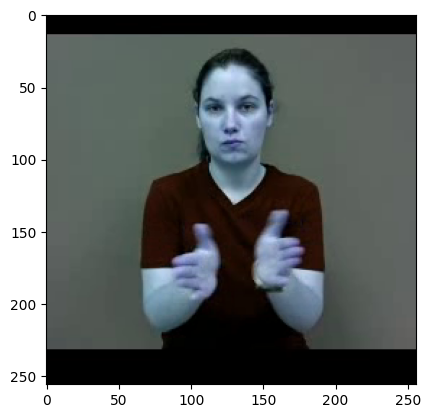

In [3]:
plt.imshow(img_test)
plt.show()

In [2]:
def open_image_detect_holistic(image_path):
    mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside
    
    # Create the holistic model
    holistic_model = mp_holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    )
    
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convert cv2 image, which is BGR format, to RGB format
    img.flags.writeable = False     #To avoid bugs
    landmarks = holistic_model.process(img) #Process the image and generate the landmark points
    img.flags.writeable = True      #Reverse previous command
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  #Convert back to BGR format

    return img, landmarks #Return the image and the results from the holistic model

In [3]:
def draw_over_image(image, landmarks):
    mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside
    mp_draw = mp.solutions.drawing_utils #For drawing the results to verify the model is working
    #Draw Face
    mp_draw.draw_landmarks(image, landmarks.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                           mp_draw.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                           mp_draw.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1))
    
    #Draw pose
    mp_draw.draw_landmarks(image, landmarks.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(0,255,255), thickness=1, circle_radius=2))
    
    #Draw left hand
    mp_draw.draw_landmarks(image, landmarks.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(255,0,255), thickness=1, circle_radius=2))
    
    #Draw right hand
    mp_draw.draw_landmarks(image, landmarks.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(127,127,127), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=2))
    
    plt.imshow(image)
    plt.show()

I0000 00:00:1732248587.327312    4062 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732248587.330969    5414 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732248587.499129    5397 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732248587.586291    5409 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732248587.589204    5403 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732248587.593747    5408 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

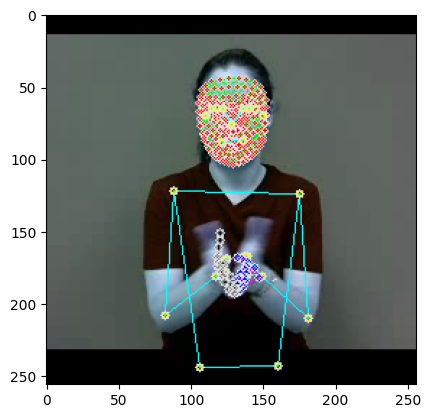

type

In [62]:
img, landmarks = open_image_detect_holistic('train/0/0/frames/0_25.png')
draw_over_image(img, landmarks)
type(landmarks)

Get the last pose landmark. Testing to see if this works

In [63]:
print(landmarks.pose_landmarks.landmark[len(landmarks.pose_landmarks.landmark)-1])

x: 0.471541792
y: 1.7528038
z: 0.311382502
visibility: 0.00376597699



This works. Now I can test a loop to get all these landmarks into a numpy list.

In [64]:
frame_pose_landmarks = []
for lm in landmarks.pose_landmarks.landmark:
    current_pose_landmark = np.array([lm.x, lm.y, lm.z, lm.visibility])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_pose_landmarks.append(current_pose_landmark)

In [65]:
frame_pose_landmarks_np = np.asarray(frame_pose_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_pose_landmarks_np.shape)
print(len(frame_pose_landmarks_np))

(33, 4)
33


There are 33 landmarks that make up the pose, and each landmark has 4 attributes (x,y,z,visibility).

I will now repeat this for the face, left hand, and right hand.

In [66]:
print(landmarks.face_landmarks.landmark[len(landmarks.face_landmarks.landmark)-1])

x: 0.56168896
y: 0.246274263
z: 0.00324537349



The face only has x,y,z attributes, so I will not be getting the visibility

In [67]:
frame_face_landmarks = []
for lm in landmarks.face_landmarks.landmark:
    current_face_landmark = np.array([lm.x, lm.y, lm.z])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_face_landmarks.append(current_face_landmark)

In [68]:
frame_face_landmarks_np = np.asarray(frame_face_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_face_landmarks_np.shape)
print(len(frame_face_landmarks_np))

(468, 3)
468


The face consists of 468 landmarks, and each landmark has 3 attributes (x,y,z).

In [69]:
print(landmarks.left_hand_landmarks.landmark[len(landmarks.left_hand_landmarks.landmark)-1])

x: 0.511461556
y: 0.74867171
z: -0.0132751977



Similar to the face landmarks, the left hand and the right hand landmarks, due to symmetry, have 3 attributes.

In [70]:
frame_left_hand_landmarks = []
for lm in landmarks.left_hand_landmarks.landmark:
    current_left_hand_landmark = np.array([lm.x, lm.y, lm.z])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_left_hand_landmarks.append(current_left_hand_landmark)

In [71]:
frame_left_hand_landmarks_np = np.asarray(frame_left_hand_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_left_hand_landmarks_np.shape)
print(len(frame_left_hand_landmarks_np))

(21, 3)
21


However, the left hand consists of only 21 landmarks, with each landmark having 3 attributes (x,y,z)

I expect the right hand to be the same

In [72]:
print(landmarks.right_hand_landmarks.landmark[len(landmarks.right_hand_landmarks.landmark)-1])

x: 0.511085749
y: 0.756257653
z: -0.0415751301



In [73]:
frame_right_hand_landmarks = []
for lm in landmarks.right_hand_landmarks.landmark:
    current_right_hand_landmark = np.array([lm.x, lm.y, lm.z])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_right_hand_landmarks.append(current_right_hand_landmark)

In [74]:
frame_right_hand_landmarks_np = np.asarray(frame_right_hand_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_right_hand_landmarks_np.shape)
print(len(frame_right_hand_landmarks_np))

(21, 3)
21


As expected, the results from the right hand landmarks are the same as the left hand

To make the data one dimensional and easier to use, I will flatten it like we did in previous assignments

In [75]:
frame_right_hand_landmarks_np_flatten = frame_right_hand_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_right_hand_landmarks_np_flatten.shape)
print(len(frame_right_hand_landmarks_np_flatten))

(63,)
63


Now the data has only one dimension.

To make it even easier to use, I will flatten all arrays and concatenate them into one big array

In [76]:
frame_left_hand_landmarks_np_flatten = frame_left_hand_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_left_hand_landmarks_np_flatten.shape)
print(len(frame_left_hand_landmarks_np_flatten))

frame_face_landmarks_np_flatten = frame_face_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_face_landmarks_np_flatten.shape)
print(len(frame_face_landmarks_np_flatten))

frame_pose_landmarks_np_flatten = frame_pose_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_pose_landmarks_np_flatten.shape)
print(len(frame_pose_landmarks_np_flatten))

(63,)
63
(1404,)
1404
(132,)
132


In [77]:
landmarks_combined = np.concatenate([frame_face_landmarks_np_flatten, frame_left_hand_landmarks_np_flatten, frame_pose_landmarks_np_flatten, frame_right_hand_landmarks_np_flatten])
print(landmarks_combined.shape)
print(len(landmarks_combined))

(1662,)
1662


Now this one array contains all the landmarks

__NOTE:__ There is a small issue though. If the holistic model does not detect one of the pose, face, or hands, it will return None. This will mess up the shape of the input data and cause problems during training. So, if a model returns None for any detections, I will create an array of zeros instead.

For example, if I try the first frame of the first video:

I0000 00:00:1732248612.076206    4062 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732248612.079438    5437 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732248612.264127    5420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732248612.359951    5421 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732248612.363289    5425 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732248612.366629    5424 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

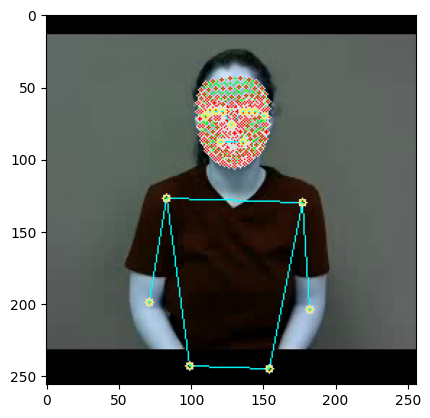

type

In [78]:
img, landmarks2 = open_image_detect_holistic('train/0/0/frames/0_1.png')
draw_over_image(img, landmarks2)
type(landmarks2)

As seen in the above image, there are no hand landmarks. So if I try to get the results for the hand landmarks, I should get None:

In [79]:
print(landmarks2.left_hand_landmarks is None)
print(landmarks2.right_hand_landmarks is None)
print(landmarks2.pose_landmarks is None)
print(landmarks2.face_landmarks is None)

True
True
False
False


In [80]:
print(len(landmarks2.face_landmarks.landmark))

468


As seen here, there are no left and right hand landmarks detected, but there are face and pose landmarks. So, I want to replace the left and right hand landmarks with an array of zeros instead of a None object

In [81]:
f_rh_lm = []
if landmarks2.right_hand_landmarks is None:
    f_rh_lm = np.zeros((21,3))
else:
    for lm in landmarks2.right_hand_landmarks.landmark:
        c_rh_lm = np.array([lm.x, lm.y, lm.z])
        f_rh_lm.append(c_rh_lm)
f_rh_lm_np = np.array(f_rh_lm)
print(f_rh_lm_np.shape)
print(f_rh_lm_np)

(21, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


This way, the numpy arrays will all be the same for every frame

So, in summary, the different landmarks are as follows:
- Face landmarks: 468 landmarks, each landmark has 3 attributes -> x, y, z
- Pose landmarks: 33 landmarks, each landmark has 4 attributes -> x, y, z, visibility
- left hand landmarks: 21 landmarks, each landmark has 3 attributes -> x, y ,z
- right hand landmark: 21 landmarks, each landmark has 3 attributes -> x, y ,z

Total combined: 1662 landmark data points

In [4]:
def retrieve_landmarks(landmark_results):
    f_p_lm = []
    f_f_lm = []
    f_lh_lm = []
    f_rh_lm = []
    
    if landmark_results.pose_landmarks is None:
        f_p_lm = np.zeros((33,4))
    else:
        for lm in landmark_results.pose_landmarks.landmark:
            c_p_lm = np.array([lm.x, lm.y, lm.z, lm.visibility])
            f_p_lm.append(c_p_lm)

    if landmark_results.face_landmarks is None:
        f_f_lm = np.zeros((468,3))
    else:
        for lm in landmark_results.face_landmarks.landmark:
            c_f_lm = np.array([lm.x, lm.y, lm.z])
            f_f_lm.append(c_f_lm)

    if landmark_results.left_hand_landmarks is None:
        f_lh_lm = np.zeros((21,3))
    else:
        for lm in landmark_results.left_hand_landmarks.landmark:
            c_lh_lm = np.array([lm.x, lm.y, lm.z])
            f_lh_lm.append(c_lh_lm)

    if landmark_results.right_hand_landmarks is None:
        f_rh_lm = np.zeros((21,3))
    else:
        for lm in landmark_results.right_hand_landmarks.landmark:
            c_rh_lm = np.array([lm.x, lm.y, lm.z])
            f_rh_lm.append(c_rh_lm)

    #Convert all arrays to numpy arrays
    f_p_lm_np = np.asarray(f_p_lm)
    f_f_lm_np = np.asarray(f_f_lm)
    f_lh_lm_np = np.asarray(f_lh_lm)
    f_rh_lm_np = np.asarray(f_rh_lm)

    #For debugging
    print(f_p_lm_np.shape)
    print(f_f_lm_np.shape)
    print(f_lh_lm_np.shape)
    print(f_rh_lm_np.shape)

    #Flatten all arrays so there are less dimensions to deal with
    f_p_lm_np_flat = f_p_lm_np.flatten()
    f_f_lm_np_flat = f_f_lm_np.flatten()
    f_lh_lm_np_flat = f_lh_lm_np.flatten()
    f_rh_lm_np_flat = f_rh_lm_np.flatten()

    #Combine all landmarks to one big array.
    return np.concatenate([f_p_lm_np_flat, f_f_lm_np_flat, f_lh_lm_np_flat, f_rh_lm_np_flat])


I will now test this

In [83]:
lms_combined = retrieve_landmarks(landmarks)
print(lms_combined.shape)

lms2_combined = retrieve_landmarks(landmarks2)
print(lms2_combined.shape)

(33, 4)
(468, 3)
(21, 3)
(21, 3)
(1662,)
(33, 4)
(468, 3)
(21, 3)
(21, 3)
(1662,)


In [89]:
print(lms_combined[1536:1662])
print(lms2_combined[1536:1662])

[ 5.74284077e-01  7.10944772e-01 -2.25607380e-07  5.65736949e-01
  6.84991360e-01 -2.02746852e-03  5.46173751e-01  6.69128120e-01
 -4.88910917e-03  5.28122365e-01  6.61316395e-01 -8.15823860e-03
  5.16630590e-01  6.60043776e-01 -1.24287568e-02  5.42341232e-01
  6.79723024e-01 -7.35105015e-03  5.36577463e-01  6.89897656e-01
 -1.46628534e-02  5.31716645e-01  6.98317885e-01 -2.30474360e-02
  5.26292622e-01  7.03060269e-01 -2.88427547e-02  5.40133834e-01
  7.00380921e-01 -9.97683965e-03  5.35663009e-01  7.11140156e-01
 -1.40391178e-02  5.28899848e-01  7.16772437e-01 -1.94734801e-02
  5.22287726e-01  7.17805684e-01 -2.51061302e-02  5.36930025e-01
  7.19631374e-01 -1.23848412e-02  5.28789282e-01  7.28965163e-01
 -1.72413327e-02  5.22930741e-01  7.32240319e-01 -1.91737656e-02
  5.16970217e-01  7.32412279e-01 -2.15412509e-02  5.32595754e-01
  7.38089383e-01 -1.47016123e-02  5.20894289e-01  7.48831272e-01
 -1.70991942e-02  5.15873313e-01  7.50614524e-01 -1.45416372e-02
  5.11461556e-01  7.48671

So the second frame that does not have left and right hand landmarks now has landmark points but there are 0. While the first image that has left and right hand landmarks has actual values.

Next, I want to save these arrays so I can load them later for training. Numpy has a function called save() that takes in the file name and array to save:

For example, I will save the array for the first image I tested above

In [91]:
np.save('test_saving_np.npy', lms_combined)

Now I can load this and verify that the data has been saved correctly

In [ ]:
load_lms_combined = np.load('test_saving_np.npy')
print(load_lms_combined.shape)
print(load_lms_combined[1536:1662])

So, this works. Now I can do this for every frame in the video. The steps are:
1. Go through every image in the word range I want
2. Pass image file path to open_image_detect_holistic() function.
3. Capture the returned landmark results from the function called in step 1
4. Pass the landmark results to the retrieve_landmarks() function
5. Capture the result of the function called in step 3. Which is one array that has all landmark points for that image.
6. Save the numpy array to a file in the directory of the instance
7. Repeat steps 2-6 for every image

In [ ]:
def words_frames_to_points(split_type = 'train', start_word = 0, end_word = 1):
    count = 0
    for root, dirs, files in os.walk(split_type):
        for file_name in files:
            if file_name.endswith('.png'):
                root_split = root.split('/')
                word_id = root_split[1]
                if int(word_id) >= start_word and int(word_id) < end_word:
                    file_name_split = file_name.split('.')
                    #print(word_id)
                    #print(file_name, root)
                    frame_path = os.path.join(root, file_name)
                    #print(f'Frame path {frame_path}')
                    directory_path = root_split[0] + '/' + root_split[1] + '/' + root_split[2] + '/points_arrays/'
                    if not os.path.exists(directory_path):
                        print(f'No directory called {directory_path}. Creating one now')
                        os.makedirs(directory_path)
                    new_path = directory_path + file_name_split[0] + '.npy'
                    #print(new_path + '\n')
                    img, img_lm = open_image_detect_holistic(frame_path)
                    lms_frame = retrieve_landmarks(img_lm)
                    np.save(new_path, lms_frame)
                    print(f'Numpy array for frame {frame_path} has been saved to {new_path}')
                    count = count + 1
    print(f'{count} frames have been converted to numpy arrays of landmark points')
    return count

In [6]:
count_lm_saved = words_frames_to_points()

No directory called train/0/19/points_arrays/. Creating one now


I0000 00:00:1732251946.064196    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251946.072773    8582 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732251946.265069    8562 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.354560    8569 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.358044    8564 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.361029    8566 inference_feedback_manager.cc:114] Feedback manager req

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_14.png has been saved to train/0/19/points_arrays/19_14.npy


W0000 00:00:1732251946.671855    8584 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.763683    8583 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.766985    8589 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.770897    8595 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.770929    8592 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251946.798803    8588 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_16.png has been saved to train/0/19/points_arrays/19_16.npy


I0000 00:00:1732251946.885688    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251946.889359    8620 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732251947.062766    8605 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.154231    8610 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.161267    8606 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.161346    8615 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_2.png has been saved to train/0/19/points_arrays/19_2.npy


W0000 00:00:1732251947.441925    8623 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.538087    8635 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.540530    8627 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.545301    8636 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.547239    8634 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.568843    8636 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_15.png has been saved to train/0/19/points_arrays/19_15.npy


I0000 00:00:1732251947.660720    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251947.664865    8658 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732251947.837851    8642 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.928692    8644 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.932299    8647 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251947.935376    8649 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_23.png has been saved to train/0/19/points_arrays/19_23.npy


W0000 00:00:1732251948.227513    8661 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.311048    8660 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.317025    8662 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.319875    8660 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.320534    8671 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.339365    8665 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_13.png has been saved to train/0/19/points_arrays/19_13.npy


I0000 00:00:1732251948.421330    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251948.424424    8696 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732251948.579353    8681 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.656075    8684 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.663123    8684 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251948.663202    8691 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_11.png has been saved to train/0/19/points_arrays/19_11.npy


W0000 00:00:1732251948.926358    8699 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.006298    8702 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.008445    8697 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.013379    8708 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.014097    8712 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.023953    8699 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_4.png has been saved to train/0/19/points_arrays/19_4.npy


W0000 00:00:1732251949.285067    8718 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.362226    8729 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.365471    8716 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.369206    8729 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.370367    8725 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.389612    8717 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_27.png has been saved to train/0/19/points_arrays/19_27.npy


W0000 00:00:1732251949.665575    8737 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.746265    8744 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.748602    8740 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.753042    8749 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.753535    8744 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251949.764308    8737 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_30.png has been saved to train/0/19/points_arrays/19_30.npy


W0000 00:00:1732251950.016647    8756 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.105497    8765 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.109731    8758 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.112342    8767 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.112461    8764 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.130988    8754 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_10.png has been saved to train/0/19/points_arrays/19_10.npy


I0000 00:00:1732251950.214488    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251950.217363    8791 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732251950.375582    8775 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.462905    8776 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.469474    8778 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.469828    8783 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_1.png has been saved to train/0/19/points_arrays/19_1.npy


W0000 00:00:1732251950.736601    8795 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.815304    8796 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.817544    8794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.821784    8800 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.822236    8801 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251950.840871    8803 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_33.png has been saved to train/0/19/points_arrays/19_33.npy


W0000 00:00:1732251951.082075    8813 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.153859    8821 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.156340    8813 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.159142    8819 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.160452    8818 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.170632    8823 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_17.png has been saved to train/0/19/points_arrays/19_17.npy


W0000 00:00:1732251951.427586    8841 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.496898    8835 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.499180    8839 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.502233    8834 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.504160    8832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.516992    8840 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_22.png has been saved to train/0/19/points_arrays/19_22.npy


W0000 00:00:1732251951.761084    8850 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.837634    8852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.839647    8854 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.844612    8855 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.846681    8859 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251951.859810    8861 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_26.png has been saved to train/0/19/points_arrays/19_26.npy


W0000 00:00:1732251952.103233    8876 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.185486    8877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.188261    8876 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.192335    8872 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.192486    8878 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.209400    8879 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_19.png has been saved to train/0/19/points_arrays/19_19.npy


W0000 00:00:1732251952.452528    8889 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.527789    8899 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.531239    8887 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.535069    8901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.535570    8898 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.545507    8888 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_6.png has been saved to train/0/19/points_arrays/19_6.npy


W0000 00:00:1732251952.805768    8908 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.883028    8912 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.885056    8911 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.885530    8907 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.890569    8917 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251952.904715    8920 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_29.png has been saved to train/0/19/points_arrays/19_29.npy


W0000 00:00:1732251953.152631    8927 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.236431    8938 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.241847    8935 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.242799    8940 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.246191    8925 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.264235    8938 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_8.png has been saved to train/0/19/points_arrays/19_8.npy


I0000 00:00:1732251953.348908    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251953.351450    8962 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732251953.507018    8946 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.596883    8952 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.599595    8956 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.603639    8959 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_28.png has been saved to train/0/19/points_arrays/19_28.npy


W0000 00:00:1732251953.873998    8965 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.947720    8970 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.950020    8968 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.951918    8972 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.954320    8966 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251953.965299    8969 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_31.png has been saved to train/0/19/points_arrays/19_31.npy


W0000 00:00:1732251954.219577    8984 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.291584    8982 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.293664    8991 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.296105    8990 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.298588    8984 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.313854    8995 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_32.png has been saved to train/0/19/points_arrays/19_32.npy


W0000 00:00:1732251954.530259    9001 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.601424    9008 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.603227    9009 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.603950    9006 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.604845    9016 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.625915    9002 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_25.png has been saved to train/0/19/points_arrays/19_25.npy


W0000 00:00:1732251954.836163    9022 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.887606    9021 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.889879    9022 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.890188    9031 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.890763    9035 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251954.899241    9027 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_7.png has been saved to train/0/19/points_arrays/19_7.npy


W0000 00:00:1732251955.075980    9042 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.121670    9049 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.123189    9051 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.125238    9044 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.126090    9048 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.138775    9046 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_18.png has been saved to train/0/19/points_arrays/19_18.npy


W0000 00:00:1732251955.286347    9060 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.331704    9066 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.333177    9069 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.333753    9061 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.334484    9062 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.344120    9066 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_24.png has been saved to train/0/19/points_arrays/19_24.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_21.png has been saved to train/0/19/points_arrays/19_21.npy


W0000 00:00:1732251955.525518    9083 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.528112    9091 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.528869    9092 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.530042    9087 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.538130    9088 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251955.551228    9086 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_20.png has been saved to train/0/19/points_arrays/19_20.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_12.png has been saved to train/0/19/points_arrays/19_12.npy


W0000 00:00:1732251955.981946    9137 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.014563    9136 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.016223    9134 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.017448    9136 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.017555    9148 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.025253    9142 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_5.png has been saved to train/0/19/points_arrays/19_5.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_3.png has been saved to train/0/19/points_arrays/19_3.npy


I0000 00:00:1732251956.204428    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251956.205939    9190 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732251956.264429    9174 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.297435    9172 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.298503    9173 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.300038    9186 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_9.png has been saved to train/0/19/points_arrays/19_9.npy
No directory called train/0/17/points_arrays/. Creating one now
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_5.png has been saved to train/0/17/points_arrays/17_5.npy


W0000 00:00:1732251956.422832    9196 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.424289    9198 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.425234    9200 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.426132    9202 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.432183    9192 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.438711    9193 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_4.png has been saved to train/0/17/points_arrays/17_4.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_16.png has been saved to train/0/17/points_arrays/17_16.npy


W0000 00:00:1732251956.639715    9231 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.670308    9238 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.671706    9229 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.673179    9235 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.673248    9233 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.680653    9240 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_10.png has been saved to train/0/17/points_arrays/17_10.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_7.png has been saved to train/0/17/points_arrays/17_7.npy


W0000 00:00:1732251956.873764    9269 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.899849    9279 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.901592    9282 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.901902    9277 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.902083    9279 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251956.907813    9272 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_6.png has been saved to train/0/17/points_arrays/17_6.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_9.png has been saved to train/0/17/points_arrays/17_9.npy


W0000 00:00:1732251957.102623    9307 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.128618    9313 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.130580    9317 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.131621    9320 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.131673    9315 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.136992    9313 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_12.png has been saved to train/0/17/points_arrays/17_12.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_2.png has been saved to train/0/17/points_arrays/17_2.npy


W0000 00:00:1732251957.329209    9346 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.352564    9352 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.354502    9353 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.354807    9352 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.355000    9354 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.360345    9344 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_1.png has been saved to train/0/17/points_arrays/17_1.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_11.png has been saved to train/0/17/points_arrays/17_11.npy


W0000 00:00:1732251957.550524    9383 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.576353    9396 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.578157    9388 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.578199    9389 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.579617    9394 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.585835    9396 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_3.png has been saved to train/0/17/points_arrays/17_3.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_8.png has been saved to train/0/17/points_arrays/17_8.npy


W0000 00:00:1732251957.781368    9421 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.807090    9419 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.808848    9423 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.810179    9426 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.810796    9434 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251957.815168    9422 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_13.png has been saved to train/0/17/points_arrays/17_13.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_15.png has been saved to train/0/17/points_arrays/17_15.npy


W0000 00:00:1732251958.017785    9458 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.046220    9466 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.047172    9464 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.048502    9467 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.049311    9463 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.056087    9470 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_17.png has been saved to train/0/17/points_arrays/17_17.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_18.png has been saved to train/0/17/points_arrays/17_18.npy


W0000 00:00:1732251958.247085    9497 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.272992    9499 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.275414    9510 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.275861    9500 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.275918    9503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.282941    9508 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/17/frames/17_14.png has been saved to train/0/17/points_arrays/17_14.npy
No directory called train/0/10/points_arrays/. Creating one now
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_2.png has been saved to train/0/10/points_arrays/10_2.npy


W0000 00:00:1732251958.476543    9534 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.501085    9537 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.502902    9538 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.503628    9537 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.504088    9546 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.508300    9545 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_68.png has been saved to train/0/10/points_arrays/10_68.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_64.png has been saved to train/0/10/points_arrays/10_64.npy


W0000 00:00:1732251958.700805    9571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.726189    9586 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.727723    9577 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.729276    9585 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.729446    9582 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.736181    9585 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_15.png has been saved to train/0/10/points_arrays/10_15.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_22.png has been saved to train/0/10/points_arrays/10_22.npy


W0000 00:00:1732251958.926898    9610 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.953249    9609 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.955347    9621 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.956126    9618 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.956634    9615 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251958.961584    9612 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_28.png has been saved to train/0/10/points_arrays/10_28.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_40.png has been saved to train/0/10/points_arrays/10_40.npy


W0000 00:00:1732251959.163260    9648 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.192333    9650 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.193482    9648 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.193745    9651 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.195781    9650 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.202108    9660 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_84.png has been saved to train/0/10/points_arrays/10_84.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_30.png has been saved to train/0/10/points_arrays/10_30.npy


W0000 00:00:1732251959.401469    9689 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.426562    9694 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.427373    9698 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.429388    9691 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.429833    9694 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.435133    9688 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_51.png has been saved to train/0/10/points_arrays/10_51.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_86.png has been saved to train/0/10/points_arrays/10_86.npy


W0000 00:00:1732251959.626724    9725 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.650741    9729 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.651947    9725 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.652068    9736 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.652656    9728 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.656745    9725 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_17.png has been saved to train/0/10/points_arrays/10_17.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_1.png has been saved to train/0/10/points_arrays/10_1.npy


W0000 00:00:1732251959.850402    9762 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.875022    9773 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.877092    9769 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.877184    9761 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.878666    9768 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251959.885184    9763 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_18.png has been saved to train/0/10/points_arrays/10_18.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_57.png has been saved to train/0/10/points_arrays/10_57.npy


W0000 00:00:1732251960.078729    9800 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.106818    9807 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.107963    9804 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.108322    9808 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.109451    9802 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.117122    9808 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_12.png has been saved to train/0/10/points_arrays/10_12.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_33.png has been saved to train/0/10/points_arrays/10_33.npy


W0000 00:00:1732251960.318771    9838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.346564    9839 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.347451    9842 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.347669    9838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.348956    9848 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.353991    9850 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_45.png has been saved to train/0/10/points_arrays/10_45.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_77.png has been saved to train/0/10/points_arrays/10_77.npy


W0000 00:00:1732251960.552116    9875 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.578659    9880 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.580131    9877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.581122    9878 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.581510    9875 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.587846    9877 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_58.png has been saved to train/0/10/points_arrays/10_58.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_75.png has been saved to train/0/10/points_arrays/10_75.npy


W0000 00:00:1732251960.775113    9915 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.802260    9923 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.805259    9922 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.805644    9918 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.805938    9926 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251960.815302    9927 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_10.png has been saved to train/0/10/points_arrays/10_10.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_60.png has been saved to train/0/10/points_arrays/10_60.npy


W0000 00:00:1732251961.010599    9952 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.033664    9964 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.034978    9960 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.036471    9966 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.036627    9959 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.042389    9960 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_69.png has been saved to train/0/10/points_arrays/10_69.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_72.png has been saved to train/0/10/points_arrays/10_72.npy


W0000 00:00:1732251961.241019    9990 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.265026    9998 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.266424    9990 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.266572   10004 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.267069   10001 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.271674    9990 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_20.png has been saved to train/0/10/points_arrays/10_20.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_71.png has been saved to train/0/10/points_arrays/10_71.npy


W0000 00:00:1732251961.470378   10029 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.498823   10035 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.499850   10030 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.500372   10041 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.502230   10035 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.509203   10036 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_39.png has been saved to train/0/10/points_arrays/10_39.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_21.png has been saved to train/0/10/points_arrays/10_21.npy


W0000 00:00:1732251961.695736   10067 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.724996   10072 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.727228   10070 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.727413   10078 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.727546   10066 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.732445   10080 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_54.png has been saved to train/0/10/points_arrays/10_54.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_23.png has been saved to train/0/10/points_arrays/10_23.npy


W0000 00:00:1732251961.933563   10105 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.956840   10113 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.959431   10116 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.959443   10118 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.960354   10111 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251961.967683   10105 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_6.png has been saved to train/0/10/points_arrays/10_6.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_35.png has been saved to train/0/10/points_arrays/10_35.npy


W0000 00:00:1732251962.163901   10142 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.189833   10146 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.191925   10150 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.192203   10147 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.192204   10156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.197808   10143 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_73.png has been saved to train/0/10/points_arrays/10_73.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_3.png has been saved to train/0/10/points_arrays/10_3.npy


W0000 00:00:1732251962.393826   10181 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.419335   10190 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.420830   10181 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.420830   10187 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.421066   10193 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.426165   10182 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_83.png has been saved to train/0/10/points_arrays/10_83.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_56.png has been saved to train/0/10/points_arrays/10_56.npy


W0000 00:00:1732251962.635807   10219 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.662760   10222 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.663850   10217 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.665601   10223 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.665706   10224 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.669997   10218 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_65.png has been saved to train/0/10/points_arrays/10_65.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_34.png has been saved to train/0/10/points_arrays/10_34.npy


W0000 00:00:1732251962.868515   10257 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.896229   10270 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.898204   10264 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.898409   10257 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.898645   10259 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251962.904702   10257 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_36.png has been saved to train/0/10/points_arrays/10_36.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_5.png has been saved to train/0/10/points_arrays/10_5.npy


W0000 00:00:1732251963.100715   10295 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.125938   10304 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.127816   10300 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.129206   10294 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.129556   10304 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.136149   10307 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_81.png has been saved to train/0/10/points_arrays/10_81.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_11.png has been saved to train/0/10/points_arrays/10_11.npy


W0000 00:00:1732251963.323334   10331 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.353068   10338 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.354240   10339 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.354317   10342 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.354928   10344 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.360772   10334 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_7.png has been saved to train/0/10/points_arrays/10_7.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_14.png has been saved to train/0/10/points_arrays/10_14.npy


W0000 00:00:1732251963.567582   10371 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.592743   10381 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.594881   10377 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.595144   10383 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.595189   10371 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.601938   10383 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_79.png has been saved to train/0/10/points_arrays/10_79.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_4.png has been saved to train/0/10/points_arrays/10_4.npy


W0000 00:00:1732251963.797795   10410 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.823522   10414 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.825011   10412 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.825161   10411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.825321   10407 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251963.830706   10408 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_85.png has been saved to train/0/10/points_arrays/10_85.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_53.png has been saved to train/0/10/points_arrays/10_53.npy


W0000 00:00:1732251964.029890   10446 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.056608   10454 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.058100   10460 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.058931   10455 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.059307   10452 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.065629   10460 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_19.png has been saved to train/0/10/points_arrays/10_19.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_16.png has been saved to train/0/10/points_arrays/10_16.npy


W0000 00:00:1732251964.257570   10486 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.280505   10492 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.282495   10487 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.282627   10497 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.282754   10495 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.288148   10496 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_66.png has been saved to train/0/10/points_arrays/10_66.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_25.png has been saved to train/0/10/points_arrays/10_25.npy


W0000 00:00:1732251964.483912   10522 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.508786   10532 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.510166   10523 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.510667   10526 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.510847   10534 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.517865   10522 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_13.png has been saved to train/0/10/points_arrays/10_13.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_24.png has been saved to train/0/10/points_arrays/10_24.npy


W0000 00:00:1732251964.718433   10564 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.751127   10570 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.753269   10559 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.753403   10569 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.753939   10571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.760168   10569 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_41.png has been saved to train/0/10/points_arrays/10_41.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_29.png has been saved to train/0/10/points_arrays/10_29.npy


W0000 00:00:1732251964.964619   10599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.990015   10606 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.991980   10597 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.992648   10600 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251964.993466   10608 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.000900   10607 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_9.png has been saved to train/0/10/points_arrays/10_9.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_47.png has been saved to train/0/10/points_arrays/10_47.npy


W0000 00:00:1732251965.191736   10637 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.219352   10647 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.220298   10636 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.221882   10646 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.222801   10637 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.229216   10639 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_26.png has been saved to train/0/10/points_arrays/10_26.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_31.png has been saved to train/0/10/points_arrays/10_31.npy


W0000 00:00:1732251965.428458   10676 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.458272   10682 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.459417   10686 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.459836   10679 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.460967   10680 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.465584   10677 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_27.png has been saved to train/0/10/points_arrays/10_27.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_44.png has been saved to train/0/10/points_arrays/10_44.npy


W0000 00:00:1732251965.669182   10713 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.694630   10718 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.696213   10722 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.697088   10724 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.698256   10715 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.703719   10711 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_49.png has been saved to train/0/10/points_arrays/10_49.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_55.png has been saved to train/0/10/points_arrays/10_55.npy


W0000 00:00:1732251965.899832   10751 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.929652   10759 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.930510   10749 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.931361   10750 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.931614   10758 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251965.936401   10749 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_70.png has been saved to train/0/10/points_arrays/10_70.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_50.png has been saved to train/0/10/points_arrays/10_50.npy


W0000 00:00:1732251966.139762   10789 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.169501   10787 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.172196   10795 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.172236   10789 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.172548   10802 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.179516   10795 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_8.png has been saved to train/0/10/points_arrays/10_8.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_37.png has been saved to train/0/10/points_arrays/10_37.npy


W0000 00:00:1732251966.372524   10827 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.397143   10829 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.398864   10833 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.399082   10836 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.399750   10832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.405487   10840 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_42.png has been saved to train/0/10/points_arrays/10_42.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_87.png has been saved to train/0/10/points_arrays/10_87.npy


W0000 00:00:1732251966.597234   10863 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.623160   10869 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.624980   10876 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.624999   10867 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.625481   10869 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.633399   10877 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_78.png has been saved to train/0/10/points_arrays/10_78.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_38.png has been saved to train/0/10/points_arrays/10_38.npy


W0000 00:00:1732251966.829490   10904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.854785   10906 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.856153   10904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.856972   10901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.857696   10905 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251966.864779   10902 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_63.png has been saved to train/0/10/points_arrays/10_63.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_82.png has been saved to train/0/10/points_arrays/10_82.npy


W0000 00:00:1732251967.063828   10943 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.090577   10948 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.092313   10949 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.092792   10941 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.094100   10950 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.100170   10953 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_67.png has been saved to train/0/10/points_arrays/10_67.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_52.png has been saved to train/0/10/points_arrays/10_52.npy


W0000 00:00:1732251967.300742   10980 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.324164   10983 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.325417   10981 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.325563   10977 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.326929   10985 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.332928   10980 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_46.png has been saved to train/0/10/points_arrays/10_46.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_61.png has been saved to train/0/10/points_arrays/10_61.npy


W0000 00:00:1732251967.547661   11016 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.573381   11022 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.574490   11019 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.575126   11023 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.575709   11015 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.583503   11030 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_43.png has been saved to train/0/10/points_arrays/10_43.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_74.png has been saved to train/0/10/points_arrays/10_74.npy


W0000 00:00:1732251967.781233   11054 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.807106   11066 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.808371   11068 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.809084   11055 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.809925   11062 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251967.817874   11053 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_48.png has been saved to train/0/10/points_arrays/10_48.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_32.png has been saved to train/0/10/points_arrays/10_32.npy


W0000 00:00:1732251968.019126   11091 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.046641   11096 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.050362   11098 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.050585   11091 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.051004   11099 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.062065   11091 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_59.png has been saved to train/0/10/points_arrays/10_59.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_62.png has been saved to train/0/10/points_arrays/10_62.npy


I0000 00:00:1732251968.221637    8496 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732251968.222874   11147 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-48-generic)
W0000 00:00:1732251968.274186   11131 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.304598   11135 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.306428   11131 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.307238   11143 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_80.png has been saved to train/0/10/points_arrays/10_80.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/10/frames/10_76.png has been saved to train/0/10/points_arrays/10_76.npy
No directory called train/0/28/points_arrays/. Creating one now


W0000 00:00:1732251968.672269   11190 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.701991   11186 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.703635   11196 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.703635   11194 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.703839   11187 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732251968.709326   11192 inference_feedback_manager.cc:114] Feedback manager 

(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/28/frames/28_23.png has been saved to train/0/28/points_arrays/28_23.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/28/frames/28_70.png has been saved to train/0/28/points_arrays/28_70.npy


: 